In [8]:
import os
import re
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

In [14]:
event_gc = {
    'shooting_texas': ("2022-05-24", "2022-05-24"),
    'shooting_illinois': ("2022-07-04", "2022-07-04"),
    'shooting_MIV': ("2022-06-07", "2022-06-07"),
    'shooting_colorado': ("2022-11-19", "2022-11-20"),
}
event_titles = {
    'shooting_texas': "Texas Robb Elementary School Shooting",
    'shooting_illinois': "Illinois Highland Park Parade Shooting",
    'shooting_MIV': "Shootings in Maryland, Illinois, Virginia",
    'shooting_colorado': "Colorado Spring Nightclub Shooting"
}

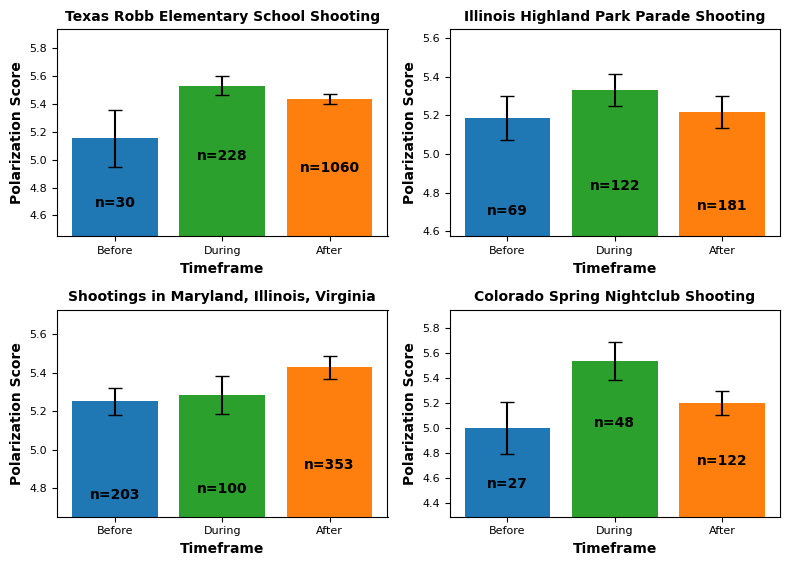

In [15]:
directory = "outputs/all_gunControl//"
pattern = re.compile(r'^.*_(\d{4}-\d{2}-\d{2}).*\.csv$')

def calculate_means_by_date(directory, start_date, end_date):
    date_means = {'before': [], 'during': [], 'after': []}
    for file in os.listdir(directory):
        match = pattern.match(file)
        if match:
            file_date_str = match.group(1)
            file_date = datetime.strptime(file_date_str, "%Y-%m-%d")
            
            if start_date - timedelta(days=3) <= file_date < start_date:
                df = pd.read_csv(os.path.join(directory, file))
                if 'Interaction Class' in df.columns:
                    mean_value = df['Interaction Class'].dropna().mean()
                    if not pd.isna(mean_value):
                        date_means['before'].append(mean_value)
            elif start_date <= file_date <= end_date:
                df = pd.read_csv(os.path.join(directory, file))
                if 'Interaction Class' in df.columns:
                    mean_value = df['Interaction Class'].dropna().mean()
                    if not pd.isna(mean_value):
                        date_means['during'].append(mean_value)
            elif end_date < file_date <= end_date + timedelta(days=3):
                df = pd.read_csv(os.path.join(directory, file))
                if 'Interaction Class' in df.columns:
                    mean_value = df['Interaction Class'].dropna().mean()
                    if not pd.isna(mean_value):
                        date_means['after'].append(mean_value)

    return date_means

fig, axes = plt.subplots(2, 2, figsize=(8, 6)) 
axes = axes.flatten()  

for idx, (event_name, (start_date_str, end_date_str)) in enumerate(event_gc.items()):

    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")

    date_means = calculate_means_by_date(directory, start_date, end_date)

    means = [np.mean(date_means[bucket]) if len(date_means[bucket]) > 0 else 0 for bucket in ['before', 'during', 'after']]
    errors = [np.std(date_means[bucket]) / np.sqrt(len(date_means[bucket])) if len(date_means[bucket]) > 1 else 0 for bucket in ['before', 'during', 'after']]
    count = [len(date_means[bucket]) for bucket in ['before', 'during', 'after']]
  
    ax = axes[idx]
    bars = ax.bar(['Before', 'During', 'After'], means, yerr=errors, capsize=5, color=['#1f77b4', '#2ca02c', '#ff7f0e'])
    for bar, cnt in zip(bars, count):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() * 0.9, 
                f"n={cnt}", ha='center', va='bottom', fontsize=10, fontweight='bold')

    
    
    ax.set_title(f"{event_titles[event_name]}", fontsize=10, fontweight='bold')    
    ax.set_ylabel("Polarization Score", fontsize=10, fontweight='bold')
    ax.set_xlabel("Timeframe", fontsize=10, fontweight='bold')
    ax.tick_params(axis='both', which='major', labelsize=8)    
    ax.set_ylim(min(means) - max(errors) - 0.5, max(means) + max(errors) + 0.2)

plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.suptitle("", fontsize=14, fontweight='bold')
fig.savefig("outputs/res_gc_pscore.png", dpi=300)
plt.show()

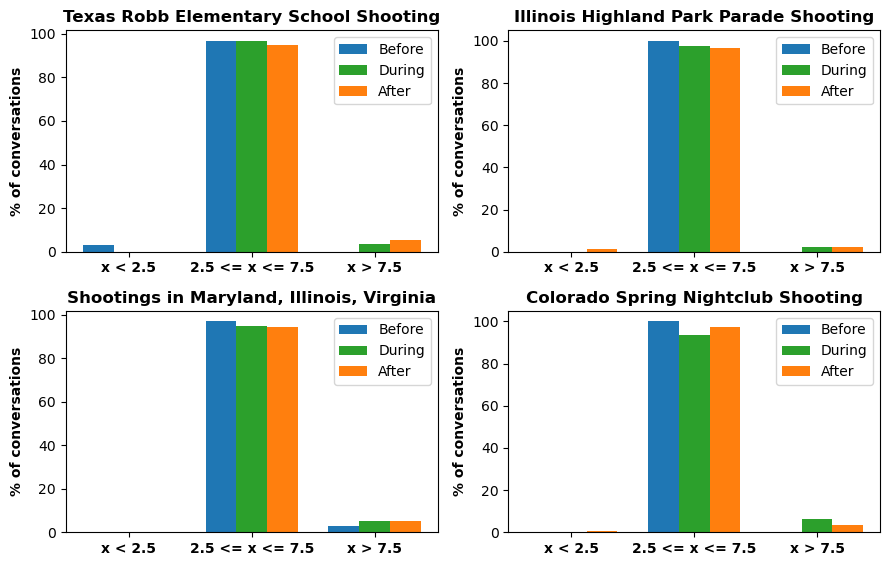

In [16]:
directory = "outputs/all_gunControl//"
pattern = re.compile(r'^.*_(\d{4}-\d{2}-\d{2}).*\.csv$')

def calculate_means_by_date(directory, start_date, end_date):
    date_means = {'before': [], 'during': [], 'after': []}
    for file in os.listdir(directory):
        match = pattern.match(file)
        if match:
            file_date_str = match.group(1)
            file_date = datetime.strptime(file_date_str, "%Y-%m-%d")
            
            if start_date - timedelta(days=3) <= file_date < start_date:
                df = pd.read_csv(os.path.join(directory, file))
                if 'Interaction Class' in df.columns:
                    mean_value = df['Interaction Class'].dropna().mean()
                    if not pd.isna(mean_value):
                        date_means['before'].append(mean_value)
            elif start_date <= file_date <= end_date:
                df = pd.read_csv(os.path.join(directory, file))
                if 'Interaction Class' in df.columns:
                    mean_value = df['Interaction Class'].dropna().mean()
                    if not pd.isna(mean_value):
                        date_means['during'].append(mean_value)
            elif end_date < file_date <= end_date + timedelta(days=3):
                df = pd.read_csv(os.path.join(directory, file))
                if 'Interaction Class' in df.columns:
                    mean_value = df['Interaction Class'].dropna().mean()
                    if not pd.isna(mean_value):
                        date_means['after'].append(mean_value)

    return date_means

def calculate_percentage(date_means):
    thresholds = [(0, 2.5), (2.5, 7.5), (7.5, np.inf)]
    percentages = {'before': [], 'during': [], 'after': []}
    
    for bucket in ['before', 'during', 'after']:
        total = len(date_means[bucket])
        for lower, upper in thresholds:
            count = sum(lower <= x <= upper for x in date_means[bucket])
            percentages[bucket].append((count / total) * 100 if total > 0 else 0)
    
    return percentages

fig, axes = plt.subplots(2, 2, figsize=(9, 6)) 
axes = axes.flatten()  

for idx, (event_name, (start_date_str, end_date_str)) in enumerate(event_gc.items()):
    start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
    end_date = datetime.strptime(end_date_str, "%Y-%m-%d")

    date_means = calculate_means_by_date(directory, start_date, end_date)
    percentages = calculate_percentage(date_means)

    ax = axes[idx]
    bar_width = 0.25
    x = np.arange(3) 

    ax.bar(x - bar_width, percentages['before'], width=bar_width, label='Before', color='#1f77b4')
    ax.bar(x, percentages['during'], width=bar_width, label='During', color='#2ca02c')
    ax.bar(x + bar_width, percentages['after'], width=bar_width, label='After', color='#ff7f0e')

    ax.set_xticks(x)
    ax.set_xticklabels(['x < 2.5', '2.5 <= x <= 7.5', 'x > 7.5'], fontsize=10, fontweight='bold')
    ax.set_ylabel('% of conversations', fontsize=10, fontweight='bold')
    ax.set_title(f"{event_titles[event_name]}", fontsize=12, fontweight='bold')    
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
fig.suptitle("", fontsize=14)
plt.savefig("outputs/res_gc_percentage.png", dpi=300)
plt.show()